## A Practical Guide to the NeXus Data Format

Make an HDF5 file without and with NeXus annotations.

In [1]:
%matplotlib widget

In [2]:
# Import the required packages.
import h5py
import matplotlib.pyplot as plt
import numpy as np
import silx.io.nxdata
from jupyterlab_h5web import H5Web

## Load the data from an XDI file

An XAFS Data Interchange Format (XDI) file is an ASCII file format that can be used to describe a single XAS spectrum.

In [3]:
!head -n 35 fe_metal_rt.xdi 

# XDI/1.0 GSE/1.0
# Column.1: energy eV
# Column.2: mutrans
# Column.3: i0
# Element.edge: K
# Element.symbol: Fe
# Scan.edge_energy: 7112.
# Mono.name: Si 111
# Mono.d_spacing: 3.13550
# Beamline.name: 13-BM-D
# Beamline.collimation: none
# Beamline.focusing: no
# Beamline.harmonic_rejection: detuned 50%
# Facility.name: APS
# Facility.energy: 7.00 GeV
# Facility.xray_source: APS bending magnet
# Scan.start_time: 2002-03-16T19:49:43
# Detector.I0: 15cm  N2
# Detector.I1: 15cm  N2
# Sample.name: Fe metal foil
# Sample.prep: standard foil (Joe Wong boxed set)
# ///
# room temperature
# measured at beamline 13-BM-D
# vert slits = 2mm (at 45m)
#----
#   energy       mutrans            i0
  6962.0000       0.10632858        303156.00
  6972.0000       0.96232605E-01    305705.00
  6982.0000       0.86022042E-01    305821.00
  6992.0000       0.75641065E-01    306373.00
  7002.0000       0.65761946E-01    305919.00
  7012.0000       0.55578092E-01    305809.00
  7022.0000       0.45934329E-

In [4]:
# Read the data from the XDI file.
e, mutrans, i0 = np.loadtxt("fe_metal_rt.xdi", unpack=True)

In [5]:
# Create the new variable "mutrans_norm".
mutrans_norm = mutrans / i0

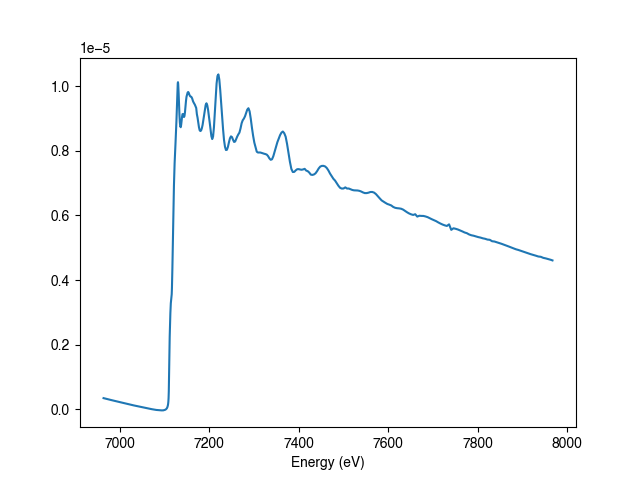

In [6]:
# Plot mutrans_norm vs energy.
fig, ax = plt.subplots()
ax.plot(e, mutrans_norm)
ax.set_xlabel("Energy (eV)")
plt.show()

## Make an HDF5 file

In [7]:
with h5py.File("fe_metal_rt.h5", "w") as f:
    # Create a group called "scan1".
    scan1 = f.create_group("scan1")

    # Create a group called "data" inside "scan1".
    data = scan1.create_group("data")

    # Create datasets called "e", "mutrans", "mutrans_norm", "i0" inside "data".
    e_ds = data.create_dataset("e", data=e)
    mutrans_ds = data.create_dataset("mutrans", data=mutrans)
    mutrans_norm_ds = data.create_dataset("mutrans_norm", data=mutrans_norm)
    i0_ds = data.create_dataset("i0", data=i0)

<img src="images/hdf5.png" align="center" width=100%>

In [8]:
# HDF5 is a binary file.
!head -n 5 fe_metal_rt.h5

�HDF

      �             �������A      ��������        `              �       �                        �       �      TREE   ����������������        �                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            HEAP    X              �              scan1          H                                                                                 H      h      TREE   ����������������        �	                                                                                                                                       

In [9]:
# Open the file. If it doesn't work, you can upload it on the https://myhdf5.hdfgroup.org website.
# Notice that no default plot is shown.
H5Web("fe_metal_rt.h5")

<jupyterlab_h5web.widget.H5Web object>

## Make a NeXus HDF5 file

In [ ]:
with h5py.File("fe_metal_rt_nexus.h5", "w") as f:
    # Create a group called "scan1".
    scan1 = f.create_group("scan1")

    # Set the "scan1" group as the default group and give it a class of "NXentry".
    f.attrs["default"] = "scan1"
    scan1.attrs["NX_class"] = "NXentry"

    # Create a group called "data" inside "scan1".
    data = scan1.create_group("data")

    # Set the "data" group as the default and give it a class of "NXdata". Set the
    # signal and axes attributes.
    scan1.attrs["default"] = "data"
    data.attrs["NX_class"] = "NXdata"
    data.attrs["signal"] = "mutrans_norm"
    data.attrs["axes"] = ["e"]
    # Add the "title" dataset to the data group.
    data.create_dataset("title", data="Fe metal RT")

    # Create datasets called "e", "mutrans", "mutrans_norm", "i0" inside "data".
    e_ds = data.create_dataset("e", data=e)
    mutrans_ds = data.create_dataset("mutrans", data=mutrans)
    mutrans_norm_ds = data.create_dataset("mutrans_norm", data=mutrans_norm)
    i0_ds = data.create_dataset("i0", data=i0)

    # Set the units attribute for the "e" dataset.
    e_ds.attrs["units"] = "eV"

<img src="images/nexus_hdf5.png" align="center" width=100%>

In [10]:
# Open the file. If it doesn't work, you can upload it on the https://myhdf5.hdfgroup.org website.
# The default plot is presented to the user when opening the file.
H5Web("fe_metal_rt_nexus.h5")

<jupyterlab_h5web.widget.H5Web object>

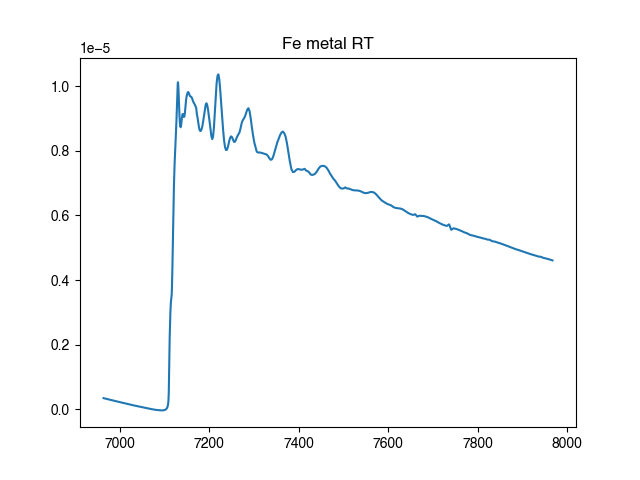

In [11]:
# Read the data from the NeXus HDF5 file without having to know the group structure.
with silx.io.open("fe_metal_rt_nexus.h5") as f:
    data = silx.io.nxdata.get_default(f)

    fig, ax = plt.subplots()
    ax.plot(data.axes[0][()], data.signal[()])
    ax.set_title(data.title)

# Additional resources

- How to write NeXus files
  - <https://manual.nexusformat.org/introduction>
  -  <https://www.silx.org/doc/silx/latest/Tutorials/writing_NXdata.html>
- How to validate NeXus files
  - <https://github.com/prjemian/punx>
- How the default data is found
  - <https://www.nexusformat.org/2014_How_to_find_default_data.html>
- Definitions of base classes
  - <https://manual.nexusformat.org/classes/base_classes/NXdata.html#nxdata>
- Application definitions
  - <https://manual.nexusformat.org/classes/applications/NXcanSAS.html>
  - <https://manual.nexusformat.org/classes/applications/NXtomo.html>
- Implementation of application definitions
  - <https://gitlab.esrf.fr/tomotools/nxtomo>